<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA_Liver_Cancer_(LIHC)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.LIHC.sampleMap_HiSeqV2_PANCAN.gz  TCGA.LIHC.sampleMap_LIHC_clinicalMatrix


In [ ]:
!pip install sparse_lmm

In [ ]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.LIHC.sampleMap_LIHC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.LIHC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [ ]:
print("clinical_data")
clinical_data.head()

clinical_data


,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,adjacent_hepatic_tissue_inflammation_extent_type,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,...,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_LIHC_mutation_bcgsc_gene,_GENOMIC_ID_data/public/TCGA/LIHC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_LIHC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_LIHC_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2,_GENOMIC_ID_TCGA_LIHC_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_LIHC_mutation_broad_gene,_GENOMIC_ID_TCGA_LIHC_hMethyl450
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S-01,TCGA-2V-A95S,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,Severe,NaN,3.5,...,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01,TCGA-2V-A95S-01,53796be6-1c87-448a-9928-3c640e9d3414,NaN,53796be6-1c87-448a-9928-3c640e9d3414,53796be6-1c87-448a-9928-3c640e9d3414,NaN,TCGA-2V-A95S-01A-11D-A36Y-05
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,58.0,3.5,...,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS-01,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,7b0d0cd1-3770-4e1c-9a64-93e41825a3b7,NaN,TCGA-2Y-A9GS-01A-12D-A383-05
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,51.0,3.5,...,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT-01,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,e1ab65b5-ee17-4e86-93aa-446c8f387ef1,NaN,TCGA-2Y-A9GT-01A-11D-A383-05
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,None,55.0,3.5,...,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU-01,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,6f3f7f73-b031-424e-ba7c-263f802dd6cf,6f3f7f73-b031-424e-ba7c-263f802dd6cf,NaN,TCGA-2Y-A9GU-01A-11D-A383-05
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,TCGA Liver Cancer (LIHC),liver hepatocellular carcinoma,Liver,NaN,NaN,NaN,54.0,3.5,...,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV-01,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,c0bcdbc7-9bed-49b7-93ca-f82ffc2929a1,NaN,TCGA-2Y-A9GV-01A-11D-A383-05


In [ ]:
print("gene_data")
gene_data.head()

gene_data


,TCGA-FV-A495-01,TCGA-G3-A3CH-11,TCGA-CC-A3MB-01,TCGA-BC-A3KF-01,TCGA-DD-A4NV-01,TCGA-CC-A1HT-01,TCGA-BD-A3EP-01,TCGA-FV-A3R2-11,TCGA-CC-A3MA-01,TCGA-ZP-A9CV-01,...,TCGA-UB-A7ME-01,TCGA-DD-A4NR-01,TCGA-G3-A25U-01,TCGA-DD-AAE6-01,TCGA-G3-AAV2-01,TCGA-BC-A10Z-11,TCGA-ZP-A9CY-01,TCGA-DD-A39Y-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.317808,1.154608,1.379008,1.297208,2.152708,0.630408,1.704608,1.623908,-0.181992,2.131908,...,2.054208,2.233208,2.631908,2.681008,0.450608,1.612908,1.976308,1.730308,1.894908,1.661008
HIF3A,-0.306526,-0.170026,-1.553426,-2.617326,-0.769026,1.332674,-1.645126,-0.266926,-2.699826,-0.332026,...,-2.335226,-2.547826,-0.016726,-2.982226,-0.632926,-2.351726,-1.031826,-5.554726,-1.795626,-1.608526
RNF17,3.664565,-0.531035,-0.531035,-0.531035,-0.531035,3.990065,6.344665,-0.531035,-0.531035,-0.531035,...,0.141565,6.296965,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,-0.272872,-0.108572,0.301528,0.815528,-0.315972,0.076128,0.224028,-0.039372,-0.830372,0.447428,...,-0.101772,0.100028,-0.631672,0.693828,0.084428,0.026428,-0.024972,0.363228,0.313828,0.041328
RNF11,-1.368378,0.430122,-1.143078,-1.021978,-0.131078,-0.153778,-0.531678,-0.151678,-0.022478,-0.084578,...,-0.511478,-0.935778,-0.172778,-1.028278,-0.365578,0.075122,-0.097878,-0.338378,0.609522,0.292622


In [ ]:
gene_data.head(60)

,TCGA-FV-A495-01,TCGA-G3-A3CH-11,TCGA-CC-A3MB-01,TCGA-BC-A3KF-01,TCGA-DD-A4NV-01,TCGA-CC-A1HT-01,TCGA-BD-A3EP-01,TCGA-FV-A3R2-11,TCGA-CC-A3MA-01,TCGA-ZP-A9CV-01,...,TCGA-UB-A7ME-01,TCGA-DD-A4NR-01,TCGA-G3-A25U-01,TCGA-DD-AAE6-01,TCGA-G3-AAV2-01,TCGA-BC-A10Z-11,TCGA-ZP-A9CY-01,TCGA-DD-A39Y-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.317808,1.154608,1.379008,1.297208,2.152708,0.630408,1.704608,1.623908,-0.181992,2.131908,...,2.054208,2.233208,2.631908,2.681008,0.450608,1.612908,1.976308,1.730308,1.894908,1.661008
HIF3A,-0.306526,-0.170026,-1.553426,-2.617326,-0.769026,1.332674,-1.645126,-0.266926,-2.699826,-0.332026,...,-2.335226,-2.547826,-0.016726,-2.982226,-0.632926,-2.351726,-1.031826,-5.554726,-1.795626,-1.608526
RNF17,3.664565,-0.531035,-0.531035,-0.531035,-0.531035,3.990065,6.344665,-0.531035,-0.531035,-0.531035,...,0.141565,6.296965,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,-0.272872,-0.108572,0.301528,0.815528,-0.315972,0.076128,0.224028,-0.039372,-0.830372,0.447428,...,-0.101772,0.100028,-0.631672,0.693828,0.084428,0.026428,-0.024972,0.363228,0.313828,0.041328
RNF11,-1.368378,0.430122,-1.143078,-1.021978,-0.131078,-0.153778,-0.531678,-0.151678,-0.022478,-0.084578,...,-0.511478,-0.935778,-0.172778,-1.028278,-0.365578,0.075122,-0.097878,-0.338378,0.609522,0.292622
RNF13,-0.864610,0.334590,0.070490,0.027590,-0.347510,0.255990,-0.196710,0.486390,0.158290,-0.079610,...,0.047290,-0.051410,-0.415010,-0.999010,-0.528910,0.229190,0.058190,-0.736710,-0.320110,0.112390
GTF2IP1,-0.687594,-0.944194,-0.370094,0.011506,0.454106,-0.091294,-0.158294,-0.913594,0.897506,0.361806,...,0.265806,-0.898594,-0.729094,0.400406,-0.059494,-0.975394,-0.309394,-0.474794,-0.413994,-1.514694
REM1,1.420854,-0.721846,-0.704446,-2.518246,-0.401346,-0.002246,1.404054,-0.459646,2.386054,-0.974046,...,0.530554,-0.990246,-2.539346,-3.101046,-1.510946,-1.624846,-0.148746,-2.071446,0.045454,-2.776246
MTVR2,-0.423399,1.048001,-0.423399,-0.423399,-0.423399,-0.423399,-0.423399,-0.423399,0.078001,-0.423399,...,-0.423399,0.200801,-0.423399,-0.423399,-0.423399,-0.423399,-0.423399,-0.423399,-0.423399,-0.423399


In [ ]:
condition = 'sex'
condition_col = 'gender'
gene_fullname = 'TP53 gene'
gene = 'TP53'
trait = 'liver Cancer'
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)

In [ ]:
merged_data = clinical_data.join(gene_data.T)

input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

merged_data = merged_data.dropna(how='any')

merged_data.head()

,gender,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,MALE,1.437408,-3.259226,0.192865,0.251828,-0.695978,-0.14431,-1.048994,-1.627446,-0.423399,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,MALE,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,MALE,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,FEMALE,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,FEMALE,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [ ]:
merged_data['gender'] = merged_data['gender'].astype('category').cat.codes
merged_data.head()

,gender,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,1,1.437408,-3.259226,0.192865,0.251828,-0.695978,-0.14431,-1.048994,-1.627446,-0.423399,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,1,1.655908,-3.112226,3.257065,-0.266672,-0.310478,-0.22801,0.059906,0.983954,-0.423399,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,1,2.390408,-0.898826,-0.531035,0.008728,0.045422,-0.03291,-0.453594,1.791654,1.058601,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,0,2.779408,-3.746426,-0.531035,0.541128,-0.395678,-0.56191,0.725406,-0.696546,0.451701,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,0,2.047408,-1.779626,-0.531035,-0.052272,-0.009278,0.09599,-0.245494,-0.897146,0.461001,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [ ]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,gender,FBXL13,FBXL12,FBXL15,CYP27B1,FBXL17,FBXL16,FAM169A,FAM116B,FAM116A,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,1,-3.263356,-0.271607,0.794627,-0.30459,-0.048071,-2.748168,-0.145651,-0.781532,-0.34619,...,-0.748878,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088
TCGA-2Y-A9GS-01,1,-0.473756,-0.286507,0.174327,-2.77279,-0.238871,1.092932,1.841549,-1.268532,0.08401,...,-0.748878,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388
TCGA-2Y-A9GT-01,1,-0.589756,-0.219807,0.862227,0.29661,-0.026671,-3.335868,-0.343451,-0.979732,-0.51359,...,-0.748878,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188
TCGA-2Y-A9GU-01,0,-0.677256,0.265093,0.943527,-2.51589,0.186229,-1.267168,-3.087451,-0.671932,-1.76649,...,-0.748878,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088
TCGA-2Y-A9GV-01,0,-3.263356,-0.367907,0.520527,-1.87089,0.105729,-2.581268,0.808649,-1.104032,-0.96539,...,-0.748878,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688


In [ ]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,gender,FBXL13,FBXL12,FBXL15,CYP27B1,FBXL17,FBXL16,FAM169A,FAM116B,FAM116A,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,liver Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01,1,-3.263356,-0.271607,0.794627,-0.30459,-0.048071,-2.748168,-0.145651,-0.781532,-0.34619,...,-0.383517,1.454767,-1.28139,-2.248977,-1.906786,-0.351027,0.957505,-0.322433,1.048088,1
TCGA-2Y-A9GS-01,1,-0.473756,-0.286507,0.174327,-2.77279,-0.238871,1.092932,1.841549,-1.268532,0.08401,...,-1.009017,0.060067,-0.29179,-0.971977,-0.750286,0.534273,1.844505,-0.501233,0.442388,1
TCGA-2Y-A9GT-01,1,-0.589756,-0.219807,0.862227,0.29661,-0.026671,-3.335868,-0.343451,-0.979732,-0.51359,...,-1.587117,0.373167,-1.28139,-1.291377,-0.558386,0.757873,2.041505,0.250567,0.211188,1
TCGA-2Y-A9GU-01,0,-0.677256,0.265093,0.943527,-2.51589,0.186229,-1.267168,-3.087451,-0.671932,-1.76649,...,-0.171217,-1.385933,-1.28139,-1.000377,-1.427286,0.746173,1.911505,-0.778233,0.203088,1
TCGA-2Y-A9GV-01,0,-3.263356,-0.367907,0.520527,-1.87089,0.105729,-2.581268,0.808649,-1.104032,-0.96539,...,-1.587117,0.246767,-1.28139,-1.224577,-0.899786,0.826273,1.744605,-1.056233,0.178688,1


In [ ]:
input_cols = merged_data[merged_data == "TP53"].columns.tolist()
gene_list = [col for col in input_cols[gene == "TP53"]]

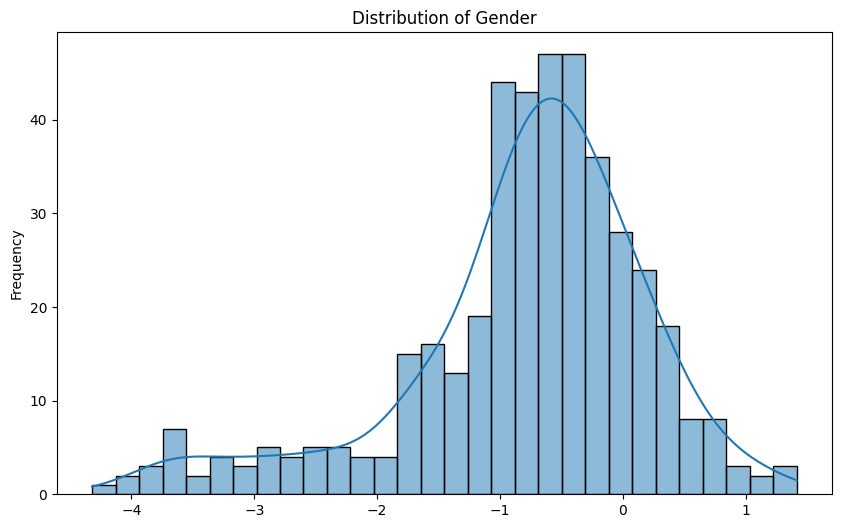

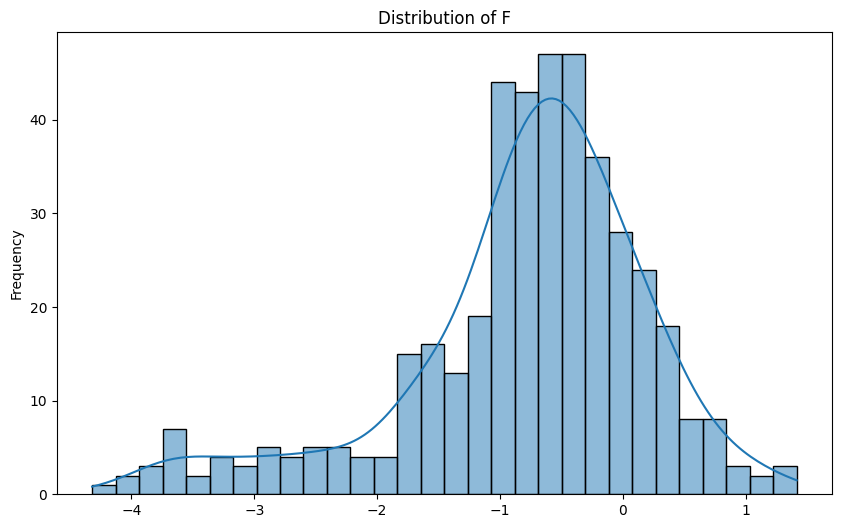

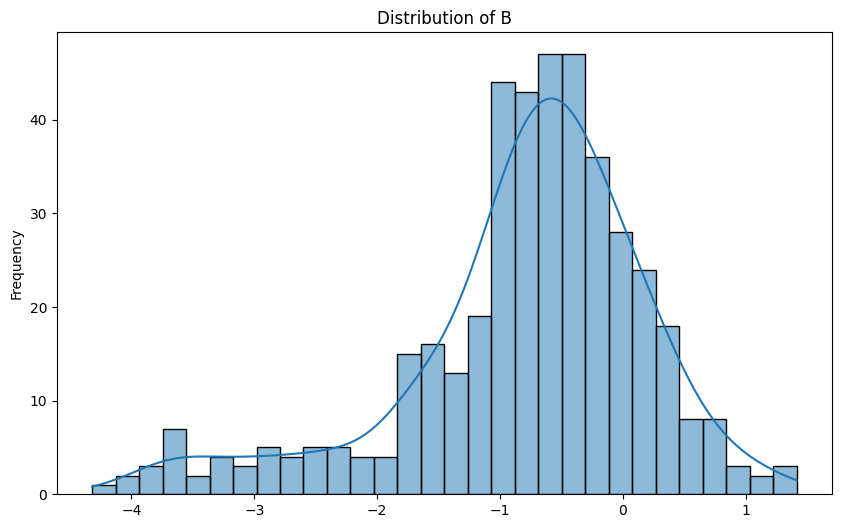

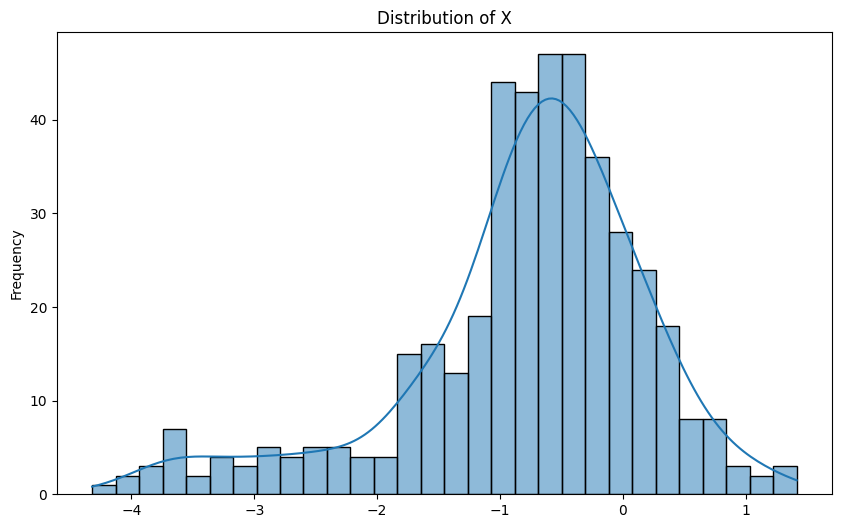

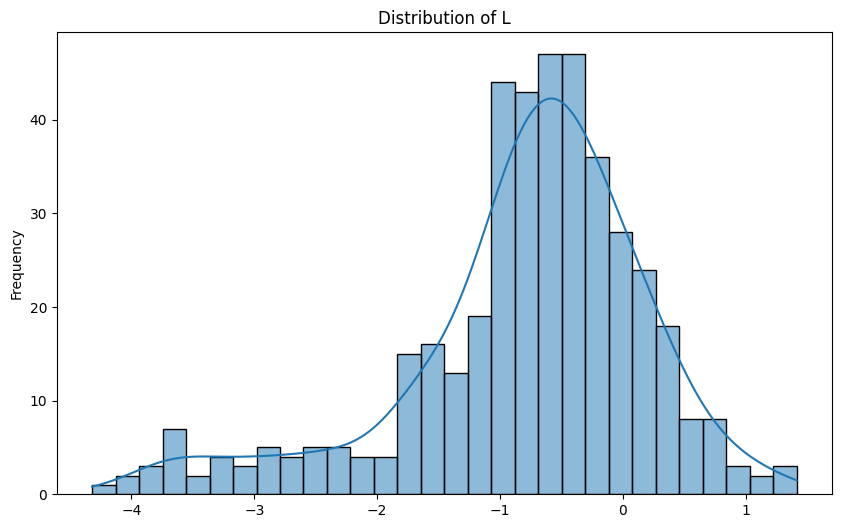

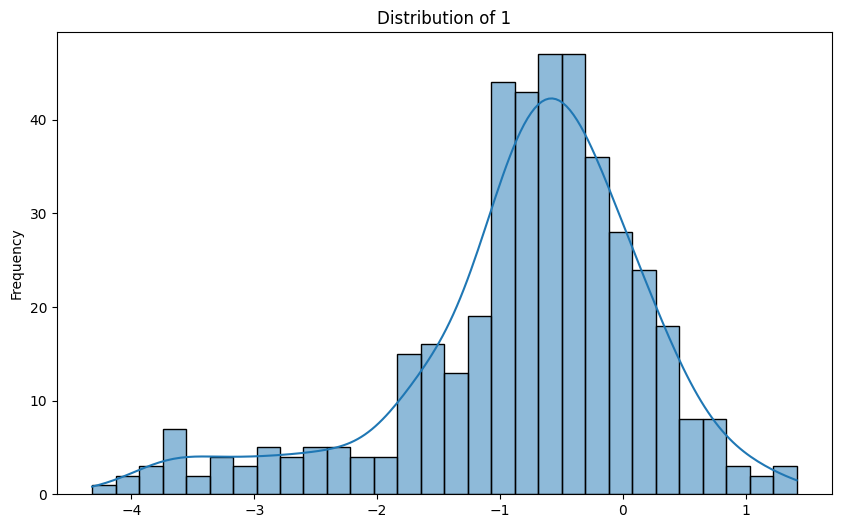

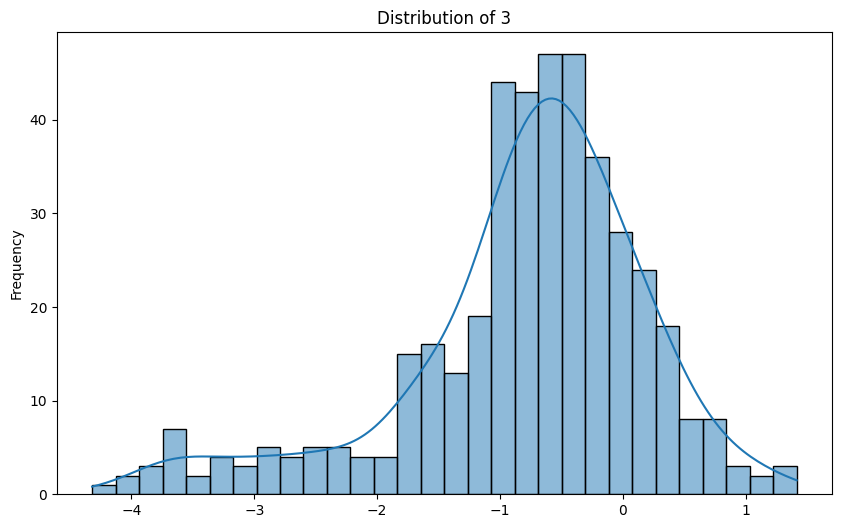

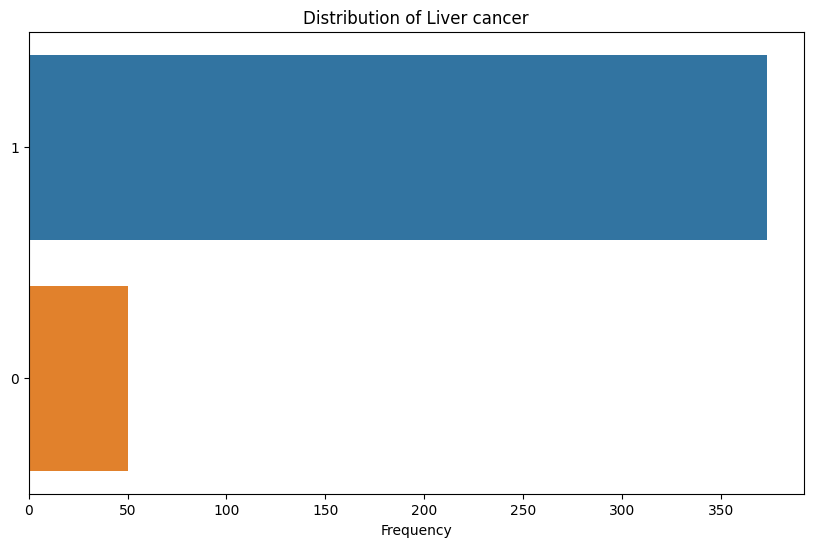

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df["TP53"], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

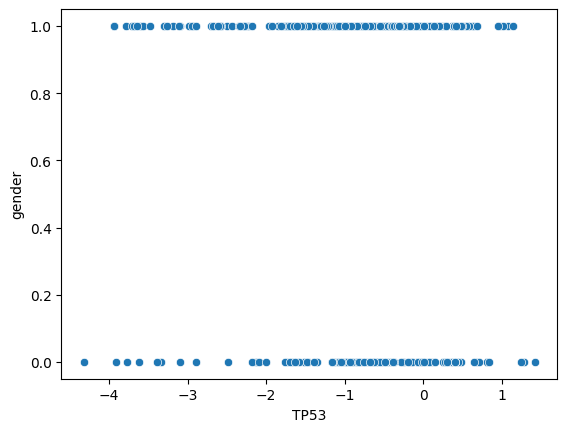

In [ ]:
sns.scatterplot(data=merged_data, x='TP53', y=condition_col)
plt.show()


In [ ]:
!pip install sparse_lmm

In [ ]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

<ipython-input-107-168e47ada711>:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.14591836734693878


In [ ]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [ ]:
# regression on Condition of gender
import statsmodels.api as sm
x = merged_data["gender"]
y = merged_data["liver Cancer"]
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           liver Cancer   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              654.6
Date:                Fri, 20 Oct 2023   Prob (F-statistic):                    7.41e-88
Time:                        22:35:34   Log-Likelihood:                         -375.51
No. Observations:                 423   AIC:                                      753.0
Df Residuals:                     422   BIC:                                      757.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
input_col = input_cols[input_cols == "TP53"]
coefficient_t = coefficients[coefficients == "TP53"]
nlog_p_values_t = nlog_p_values[nlog_p_values =="TP53"]
print(input_col)
print(coefficient_t)
print(nlog_p_values_t)

gender
-0.003071298883899817
0.2233235908842161


In [ ]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 gene and liver Cancer when considering the influence of sex?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and liver Cancer when considering the influence of sex.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and liver Cancer when considering the influence of sex.




In [ ]:
gene_result = ["TP53",-0.003071298883899817,0.2233235908842161]
condition_result = ["liver Cancer", 0.9000, 0.000]

In [ ]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n"

interpretation_coefficient_report += interpret_coefficient("TP53", -0.003071298883899817,0.2233235908842161, threshold)
interpretation_coefficient_report += interpret_coefficient("age", 0.9000 ,0.000, threshold)
print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:
Variable: TP53
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).
Variable: age
Coefficient is positive, and it is statistically significant (p-value < 0.05).



In [ ]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)


Hypothesis

For the question "What is the relationship between TP53 gene and liver Cancer when considering the influence of sex?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and liver Cancer when considering the influence of sex.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and liver Cancer when considering the influence of sex.




In [ ]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

interpretation_coefficient_report += interpret_coefficient("liver Cancer", 0.9000, 0.000, threshold)
interpretation_coefficient_report += interpret_coefficient("TP53", -0.003071298883899817,0.2233235908842161, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: liver Cancer
Coefficient is positive, and it is statistically significant (p-value < 0.05).

Variable: TP53
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).




In [ ]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"


confirmation = confirm_hypothesis("TP53", 0.9000, "TP53", threshold)
hypothesis_confirmation_report += f"Variable: {variable_name}\n"
hypothesis_confirmation_report += f"Conclusion: {confirmation}\n"

confirmation = confirm_hypothesis("age", -0.003071298883899817, "age", threshold)
hypothesis_confirmation_report += f"Variable: {variable_name}\n"
hypothesis_confirmation_report += f"Conclusion: {confirmation}\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: liver Cancer
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53 gene and liver Cancer when considering the influence of sex.
Variable: liver Cancer
Conclusion: H1 is confirmed: There is an association between the expression of the age and liver Cancer when considering the influence of sex.



